## MNIST Data straight Input (KERAS Doc. Example)

In [2]:
# install required libraries for this environment
!pip install sklearn matplotlib tensorflow 

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/7.6 MB ? eta -:--:--
      --------------------------------------- 0.1/7.6 MB 2.2 MB/s eta 0:00:04
     - -------------------------------------- 0.4/7.6 MB 3.7 MB/s eta 0:00:02
     ---- ----------------------------------- 0.8/7.6 MB 5.9 MB/s eta 0:00:02
     ------- -------------------------------- 1.4/7.6 MB 7.5 MB/s eta 0:00:01
     ---------- ----------------------------- 2.0/7.6 MB 8.7 MB/s eta 0:00:01
     ------------- -------------------------- 2.6/7.6 MB 9.3 MB/s eta 0:00:01
     ---------------- ----------------------- 3.2/7.6 MB 10.1 MB/s eta 0:00:01
     ------------------ --------------------- 3.6/7.6 MB 10.0 MB/s eta 0:00:01
     --------------------- ------------------ 4.1/7.6 MB 10.1 MB/s eta 0:00:01
     ------------------------ --------------- 4.7/7.6 MB 10.0 MB/s eta 0:00:01
     -------------------------- -----------

  DEPRECATION: sklearn is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
!pip install scikit-learn


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
# import libraries
from sklearn.model_selection import train_test_split
from scipy.io import loadmat
import matplotlib.pyplot as plt

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
# load data, special format .mat
mnist = loadmat("./data/mnist-original.mat")
mnist_data = mnist["data"].T
mnist_label = mnist["label"][0]

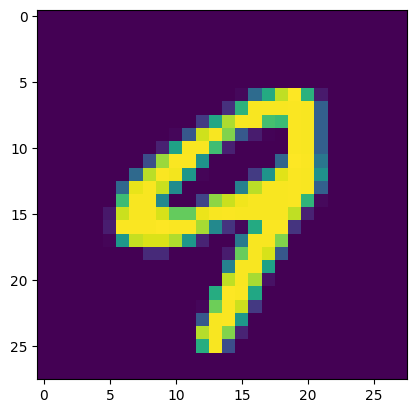

In [4]:
# show numbers as examples
data = mnist_data[70000-1].reshape(28,28)

plt.imshow(data)
#plt.xticks(np.arange(0.0, 2.5, 1), np.arange(0.5, 2, 0.5))
#plt.yticks(np.arange(2, -0.5, -1), np.arange(0.5, 2, 0.5))

In [22]:
#len(mnist_data)
mnist["label"][0]

70000

In [6]:
mnist_label[:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [7]:
mnist_data[1]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  64,
       253, 255,  63,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        96, 205, 251, 253, 205, 111,   4,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [14]:
# split data set into training and test data, together with thier labels
X_train, X_test, y_train, y_test = train_test_split(mnist_data, mnist_label, test_size=0.30, random_state=42)

In [15]:
# normalization of data for better comparison/training
X_train, X_test = X_train.astype("float32")/255, X_test.astype("float32")/255

In [16]:
X_test[1]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [17]:
# build model for deep learning
inputs = keras.Input(shape=(len(mnist_data[0]),))
dense = layers.Dense(64,activation="relu") # try adding .(inputs) directly here
x = dense(inputs)
x = layers.Dense(64,activation="relu")(x)
outputs = layers.Dense(10)(x)
#initialize model
model = keras.Model(inputs=inputs,outputs=outputs,name="mnist_model")
model.summary()

model.compile(loss= keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             optimizer=keras.optimizers.RMSprop(),
             metrics = ["accuracy"]
             )

Model: "mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [21]:
#keras.utils.plot_model(model, "my_first_model_with_shape_info.png", show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [18]:
# train model
model.fit(X_train,y_train,batch_size=64,epochs=2,validation_split=0.2)
#evaluate model
test_scores = model.evaluate(X_test,y_test)
print("Test loss: ",test_scores[0])
print("Test accuracy: ",test_scores[1])

Epoch 1/2
613/613 [==============================] - 2s 2ms/step - loss: 0.3834 - accuracy: 0.8909 - val_loss: 0.2296 - val_accuracy: 0.9324
Epoch 2/2
657/657 [==============================] - 1s 1ms/step - loss: 0.1530 - accuracy: 0.9539
Test loss:  0.15304574370384216
Test accuracy:  0.9538571238517761


In [84]:
# make predictions
prediction = model.predict(X_test[1:2])
prediction

1/1 [==============================] - 0s 65ms/step


array([[-5.4281983 , -9.30669   , -2.3205483 ,  0.8700868 , -5.5093026 ,
        -0.12808305, -6.5255446 , -9.992824  , 10.448566  , -1.8158574 ]],
      dtype=float32)

In [85]:
y_test[1]

8.0

## MNIST Data as Pictures Input

In [1]:
# import libraries
from sklearn.model_selection import train_test_split
from scipy.io import loadmat
import matplotlib.pyplot as plt

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
# load data, special format .mat
mnist = loadmat("mnist-original.mat")
mnist_data = mnist["data"].T
mnist_label = mnist["label"][0]


In [23]:
# reshape to have 28x28 Pixel pictures as Input
data = mnist_data.reshape(mnist_data.shape[0],28,28)

# split data set into training and test data, together with thier labels
X_train, X_test, y_train, y_test = train_test_split(data, mnist_label, test_size=0.30, random_state=42)

# normalization of data for better comparison/training
X_train, X_test = X_train.astype("float32")/255, X_test.astype("float32")/255

7.0


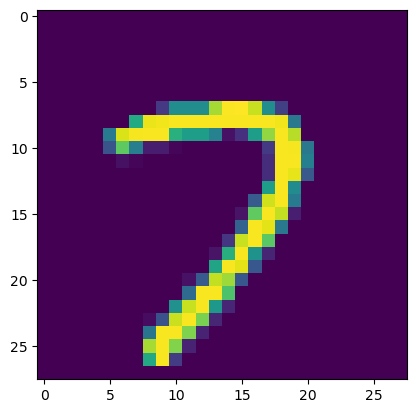

In [24]:
i=10000
print(y_train[i])
plt.imshow(X_train[i], interpolation='nearest')

In [26]:
len(data)

70000

In [66]:
# build model for deep learning
inputs = keras.Input(shape=(data[0].shape[0],data[0].shape[1],1))
x = inputs#tf.random.normal(inputs)
conv = layers.Conv2D(32,(3,3),activation="relu",input_shape=(data[0].shape[0],data[0].shape[1],1),padding="same",kernel_initializer='he_uniform' )(x)
#conv.shape
x = layers.MaxPooling2D(2,2)(conv)
x = layers.Flatten()(x)
#x.shape
dense = layers.Dense(100,activation="relu",kernel_initializer='he_uniform')(x) 

outputs = layers.Dense(10,activation="softmax")(dense)
outputs.shape
##initialize model
model = keras.Model(inputs=inputs,outputs=outputs,name="mnist_img")
model.summary()

model.compile(loss= keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             optimizer=keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
             metrics = ["accuracy"]
             )

Model: "mnist_img"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_26 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_33 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 6272)              0         
                                                                 
 dense_8 (Dense)             (None, 100)               627300    
                                                                 
 dense_9 (Dense)             (None, 10)                1010      
                                                         

In [65]:
X_test.shape

(21000, 28, 28)

In [67]:
# train model
model.fit(X_train,y_train,batch_size=64,epochs=2,validation_split=0.2)
#evaluate model
test_scores = model.evaluate(X_test,y_test)
print("Test loss: ",test_scores[0])
print("Test accuracy: ",test_scores[1])

Epoch 1/2
613/613 [==============================] - 9s 15ms/step - loss: 0.2425 - accuracy: 0.9267 - val_loss: 0.1204 - val_accuracy: 0.9641
Epoch 2/2
657/657 [==============================] - 2s 3ms/step - loss: 0.0806 - accuracy: 0.9760
Test loss:  0.0805879458785057
Test accuracy:  0.9760000109672546


In [63]:
# make predictions
prediction = model.predict(X_test[1:2])
prediction

1/1 [==============================] - 0s 128ms/step


array([[2.3524926e-07, 7.0132933e-07, 3.3362372e-05, 7.6183416e-05,
        7.9541837e-07, 4.3242998e-04, 7.3835622e-07, 1.0360923e-08,
        9.9945349e-01, 2.0281677e-06]], dtype=float32)

In [70]:
from sklearn.metrics import confusion_matrix

#Predict
y_prediction = model.predict(X_test)
y_prediction = np.argmax (y_prediction, axis = 1)
#Create confusion matrix and normalizes it over predicted (columns)
result = confusion_matrix(y_test, y_prediction , normalize='pred')
print(result)

657/657 [==============================] - 2s 3ms/step
[[9.71748660e-01 4.24989375e-04 0.00000000e+00 0.00000000e+00
  0.00000000e+00 5.21104742e-04 1.92771084e-03 0.00000000e+00
  3.74006545e-03 1.94552529e-03]
 [0.00000000e+00 9.79175521e-01 2.43546030e-03 1.42382534e-03
  4.95049505e-04 0.00000000e+00 0.00000000e+00 1.79775281e-03
  9.35016363e-04 4.86381323e-04]
 [6.81928885e-03 1.10497238e-02 9.90258159e-01 5.22069293e-03
  1.48514851e-03 0.00000000e+00 1.44578313e-03 7.19101124e-03
  1.30902291e-02 2.91828794e-03]
 [4.87092060e-04 4.24989375e-04 1.94836824e-03 9.75794969e-01
  0.00000000e+00 3.64773319e-03 0.00000000e+00 4.04494382e-03
  7.48013090e-03 1.94552529e-03]
 [1.94836824e-03 1.27496813e-03 4.87092060e-04 0.00000000e+00
  9.86633663e-01 0.00000000e+00 3.37349398e-03 2.69662921e-03
  3.74006545e-03 1.21595331e-02]
 [4.87092060e-03 1.27496813e-03 4.87092060e-04 5.69530138e-03
  4.95049505e-04 9.89577905e-01 3.37349398e-03 8.98876404e-04
  1.26227209e-02 4.37743191e-03]
 [6

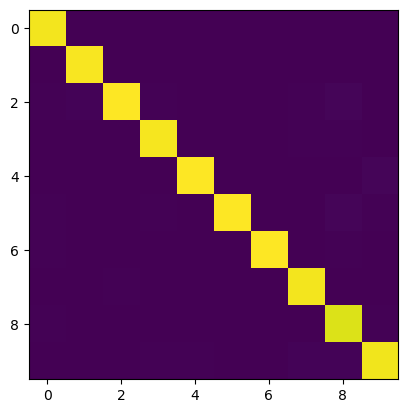

In [75]:
plt.imshow(result, interpolation='nearest')

In [74]:
result*1000

array([[9.71748660e+02, 4.24989375e-01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 5.21104742e-01, 1.92771084e+00, 0.00000000e+00,
        3.74006545e+00, 1.94552529e+00],
       [0.00000000e+00, 9.79175521e+02, 2.43546030e+00, 1.42382534e+00,
        4.95049505e-01, 0.00000000e+00, 0.00000000e+00, 1.79775281e+00,
        9.35016363e-01, 4.86381323e-01],
       [6.81928885e+00, 1.10497238e+01, 9.90258159e+02, 5.22069293e+00,
        1.48514851e+00, 0.00000000e+00, 1.44578313e+00, 7.19101124e+00,
        1.30902291e+01, 2.91828794e+00],
       [4.87092060e-01, 4.24989375e-01, 1.94836824e+00, 9.75794969e+02,
        0.00000000e+00, 3.64773319e+00, 0.00000000e+00, 4.04494382e+00,
        7.48013090e+00, 1.94552529e+00],
       [1.94836824e+00, 1.27496813e+00, 4.87092060e-01, 0.00000000e+00,
        9.86633663e+02, 0.00000000e+00, 3.37349398e+00, 2.69662921e+00,
        3.74006545e+00, 1.21595331e+01],
       [4.87092060e+00, 1.27496813e+00, 4.87092060e-01, 5.69530138e+00,
   